In [250]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from dotenv import load_dotenv

load_dotenv()

airlines_path = os.getenv("AIRLINES_PATH")
airports_path = os.getenv("AIRPORTS_PATH")
flights_path = os.getenv("FLIGHTS2_PATH")
planes_path = os.getenv("PLANES_PATH")
weather_path = os.getenv("WEATHER_PATH")

try:
    data = pd.read_json(airlines_path)
    print("Données chargées avec succès !")
    print(data.head())
except ValueError as e:
    print(f"Erreur lors de la lecture du fichier JSON : {e}")
except Exception as e:
    print(f"Une erreur s'est produite : {e}")

    
airports_data = pd.read_excel(airports_path)
flights_data = pd.read_excel(flights_path)
airlines_data = pd.read_json(airlines_path)
planes_data = pd.read_html(planes_path)[0]


Données chargées avec succès !
  carrier                    name
0      9E       Endeavor Air Inc.
1      AA  American Airlines Inc.
2      AS    Alaska Airlines Inc.
3      B6         JetBlue Airways
4      DL    Delta Air Lines Inc.


1.	Combien y-a-t-il d’aéroports 


In [251]:
try:
    unique_airports = airports_data['faa'].nunique()

    print(f"Il y a un total de {unique_airports} aéroports.")
except ValueError as e:
    print(f"Erreur lors de la lecture du fichier JSON : {e}")
except Exception as e:
    print(f"Une erreur s'est produite : {e}")

Il y a un total de 1458 aéroports.


In [252]:
try:
    num_companies = airlines_data['carrier'].nunique()

    print(f"Le nombre total de compagnies aériennes est : {num_companies}")

except ValueError as e:
    print(f"Erreur lors de la lecture du fichier JSON : {e}")
except Exception as e:
    print(f"Une erreur s'est produite : {e}")

Le nombre total de compagnies aériennes est : 16


Combien y-a-t-il d’avions

In [253]:
try:
    num_planes = planes_data['tailnum'].nunique()

    print(f"Le nombre total d'avions est : {num_planes}")

except ValueError as e:
    print(f"Erreur lors de la lecture du fichier HTML : {e}")
except Exception as e:
    print(f"Une erreur s'est produite : {e}")

Le nombre total d'avions est : 3322


In [254]:
try:
    # Remplacer les chaînes vides par NaN
    flights_data.replace('', np.nan, inplace=True)

    # Convertir les colonnes en numérique, en remplaçant les erreurs par NaN
    flights_data['dep_time'] = pd.to_numeric(flights_data['dep_time'], errors='coerce')

    # Compter le nombre de vols sans dep_time
    num_no_dep_time = flights_data['dep_time'].isna().sum()
    
    # Afficher le nombre total de vols n'ayant pas de dep_time
    print(f"Il y a un total de {num_no_dep_time} vols annulé.")

except Exception as e:
    print(f"Une erreur s'est produite lors de la lecture du fichier des vols : {e}")

Il y a un total de 6481 vols annulé.


In [255]:
try:
# print("Colonnes disponibles dans le DataFrame :")
# print(flights_data.columns)

    top_departure_airport = flights_data['origin'].value_counts().idxmax()
    top_departure_count = flights_data['origin'].value_counts().max()

    print(f"L'aéroport de départ le plus emprunté est : {top_departure_airport} avec {top_departure_count} vols.")

except Exception as e:
    print(f"Une erreur s'est produite lors de la lecture du fichier des vols : {e}")

L'aéroport de départ le plus emprunté est : EWR avec 91241 vols.


Quelles sont les 10 destinations les plus (moins) prisées (en indiquant le nom complet des destinations et non juste le code correspondant et le % corresp pour chaque destination) ? 

In [256]:
try:

    destination_counts = flights_data['dest'].value_counts()
    destination_names = airports_data.set_index('faa')['name'].to_dict()

    destination_counts = destination_counts.reset_index()
    destination_counts.columns = ['dest', 'count']
    destination_counts['name'] = destination_counts['dest'].map(destination_names)

    total_flights = destination_counts['count'].sum()
    destination_counts['percentage'] = (destination_counts['count'] / total_flights) * 100

    most_popular_destinations = destination_counts.nlargest(10, 'count')

    least_popular_destinations = destination_counts.nsmallest(10, 'count')

    print("Les 10 destinations les plus prisées :")
    for index, row in most_popular_destinations.iterrows():
        print(f"{row['name']} ({row['dest']}): {row['count']} vols ({row['percentage']:.2f}%)")

    print("\nLes 10 destinations les moins prisées :")
    for index, row in least_popular_destinations.iterrows():
        print(f"{row['name']} ({row['dest']}): {row['count']} vols ({row['percentage']:.2f}%)")

except Exception as e:
    print(f"Une erreur s'est produite : {e}")

Les 10 destinations les plus prisées :
Hartsfield Jackson Atlanta Intl (ATL): 12946 vols (5.12%)
Chicago Ohare Intl (ORD): 12654 vols (5.01%)
Los Angeles Intl (LAX): 11895 vols (4.71%)
General Edward Lawrence Logan Intl (BOS): 11560 vols (4.57%)
Orlando Intl (MCO): 10637 vols (4.21%)
Charlotte Douglas Intl (CLT): 10448 vols (4.13%)
San Francisco Intl (SFO): 9729 vols (3.85%)
Fort Lauderdale Hollywood Intl (FLL): 9443 vols (3.74%)
Miami Intl (MIA): 8938 vols (3.54%)
Ronald Reagan Washington Natl (DCA): 7386 vols (2.92%)

Les 10 destinations les moins prisées :
Blue Grass (LEX): 1 vols (0.00%)
South Bend Rgnl (SBN): 4 vols (0.00%)
Montrose Regional Airport (MTJ): 15 vols (0.01%)
Yampa Valley (HDN): 15 vols (0.01%)
Cherry Capital Airport (TVC): 16 vols (0.01%)
Key West Intl (EYW): 17 vols (0.01%)
Palm Springs Intl (PSP): 19 vols (0.01%)
Gallatin Field (BZN): 20 vols (0.01%)
Jackson Hole Airport (JAC): 25 vols (0.01%)
Charlottesville-Albemarle (CHO): 31 vols (0.01%)


Quelle sont les 10 avions qui ont le plus (moins) décollé ?

In [257]:
try:

    takeoff_counts = flights_data['tailnum'].value_counts()

    takeoff_counts_df = takeoff_counts.reset_index()
    takeoff_counts_df.columns = ['tailnum', 'takeoff_count']

    most_takeoffs = takeoff_counts_df.nlargest(10, 'takeoff_count')

    least_takeoffs = takeoff_counts_df.nsmallest(10, 'takeoff_count')

    print("Les 10 avions qui ont le plus décollé :")
    for index, row in most_takeoffs.iterrows():
        print(f"Avion {row['tailnum']}: {row['takeoff_count']} décollages")

    print("\nLes 10 avions qui ont le moins décollé :")
    for index, row in least_takeoffs.iterrows():
        print(f"Avion {row['tailnum']}: {row['takeoff_count']} décollages")

except Exception as e:
    print(f"Une erreur s'est produite lors de la lecture du fichier des vols : {e}")

Les 10 avions qui ont le plus décollé :
Avion  : 1973 décollages
Avion N725MQ: 443 décollages
Avion N723MQ: 394 décollages
Avion N713MQ: 385 décollages
Avion N722MQ: 378 décollages
Avion N711MQ: 376 décollages
Avion N258JB: 332 décollages
Avion N353JB: 316 décollages
Avion N542MQ: 310 décollages
Avion N351JB: 310 décollages

Les 10 avions qui ont le moins décollé :
Avion N7ALAA: 1 décollages
Avion N820AW: 1 décollages
Avion N826AW: 1 décollages
Avion N750AT: 1 décollages
Avion N838MH: 1 décollages
Avion N810AW: 1 décollages
Avion N587NW: 1 décollages
Avion N534AS: 1 décollages
Avion N913EV: 1 décollages
Avion N5DJAA: 1 décollages


In [258]:
# # Créer des index sur des colonnes spécifiques (facultatif)
# flights_df.set_index('dep_time', inplace=True)
# #airlines_df.set_index('carrier', inplace=True)
# flights_df.set_index('tailnum', inplace=True)


In [259]:
try:
    unique_airports = airports_data['faa'].nunique()

    print(f"Il y a un total de {unique_airports} aéroports.")
except ValueError as e:
    print(f"Erreur lors de la lecture du fichier JSON : {e}")
except Exception as e:
    print(f"Une erreur s'est produite : {e}")

Il y a un total de 1458 aéroports.


In [260]:
try:
    num_companies = airlines_data['carrier'].nunique()

    print(f"Le nombre total de compagnies aériennes est : {num_companies}")

except ValueError as e:
    print(f"Erreur lors de la lecture du fichier JSON : {e}")
except Exception as e:
    print(f"Une erreur s'est produite : {e}")

Le nombre total de compagnies aériennes est : 16


In [261]:
try:
    num_planes = planes_data['tailnum'].nunique()

    print(f"Le nombre total d'avions est : {num_planes}")

except ValueError as e:
    print(f"Erreur lors de la lecture du fichier HTML : {e}")
except Exception as e:
    print(f"Une erreur s'est produite : {e}")

Le nombre total d'avions est : 3322


In [262]:
try:
    # flights_data.replace('', np.nan, inplace=True)

    flights_data['dep_time'] = pd.to_numeric(flights_data['dep_time'], errors='coerce')

    num_no_dep_time = flights_data['dep_time'].isna().sum()
    
    print(f"Il y a un total de {num_no_dep_time} vols annulé.")

except Exception as e:
    print(f"Une erreur s'est produite lors de la lecture du fichier des vols : {e}")

Il y a un total de 6481 vols annulé.


Quel est l’aéroport de départ le plus emprunté ?

Combien chaque compagnie a desservi de destination


In [263]:
try:
    destinations_per_carrier = flights_data.groupby('carrier')['dest'].nunique().reset_index()

    destinations_per_carrier.columns = ['Compagnie', 'Nombre de Destinations']

    print("Nombre de destinations desservies par chaque compagnie :")
    print(destinations_per_carrier)

except Exception as e:
    print(f"Une erreur s'est produite lors de la lecture du fichier des vols : {e}")

Nombre de destinations desservies par chaque compagnie :
   Compagnie  Nombre de Destinations
0         9E                      47
1         AA                      19
2         AS                       1
3         B6                      42
4         DL                      40
5         EV                      61
6         F9                       1
7         FL                       3
8         HA                       1
9         MQ                      20
10        OO                       4
11        UA                      45
12        US                       5
13        VX                       5
14        WN                      11
15        YV                       3


In [264]:
try:
    destinations_per_carrier_origin = flights_data.groupby(['carrier', 'origin'])['dest'].nunique().reset_index()

    destinations_per_carrier_origin.columns = ['Compagnie', 'Aéroport d\'Origine', 'Nombre de Destinations']

    print("Nombre de destinations desservies par chaque compagnie et par aéroport d'origine :")
    print(destinations_per_carrier_origin)

except Exception as e:
    print(f"Une erreur s'est produite lors de la lecture du fichier des vols : {e}")


Nombre de destinations desservies par chaque compagnie et par aéroport d'origine :
   Compagnie Aéroport d'Origine  Nombre de Destinations
0         9E                EWR                       4
1         9E                JFK                      34
2         9E                LGA                      36
3         AA                EWR                       3
4         AA                JFK                      17
5         AA                LGA                       5
6         AS                EWR                       1
7         B6                EWR                       7
8         B6                JFK                      42
9         B6                LGA                       6
10        DL                EWR                       4
11        DL                JFK                      29
12        DL                LGA                      22
13        EV                EWR                      53
14        EV                JFK                       3
15        EV         

Réaliser les graphiques adéquats qui synthétisent ces informations ? 

C:\Users\Quentin\AppData\Local\Temp\ipykernel_579672\1659284715.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=destinations_per_carrier.sort_values('Nombre de Destinations', ascending=False),


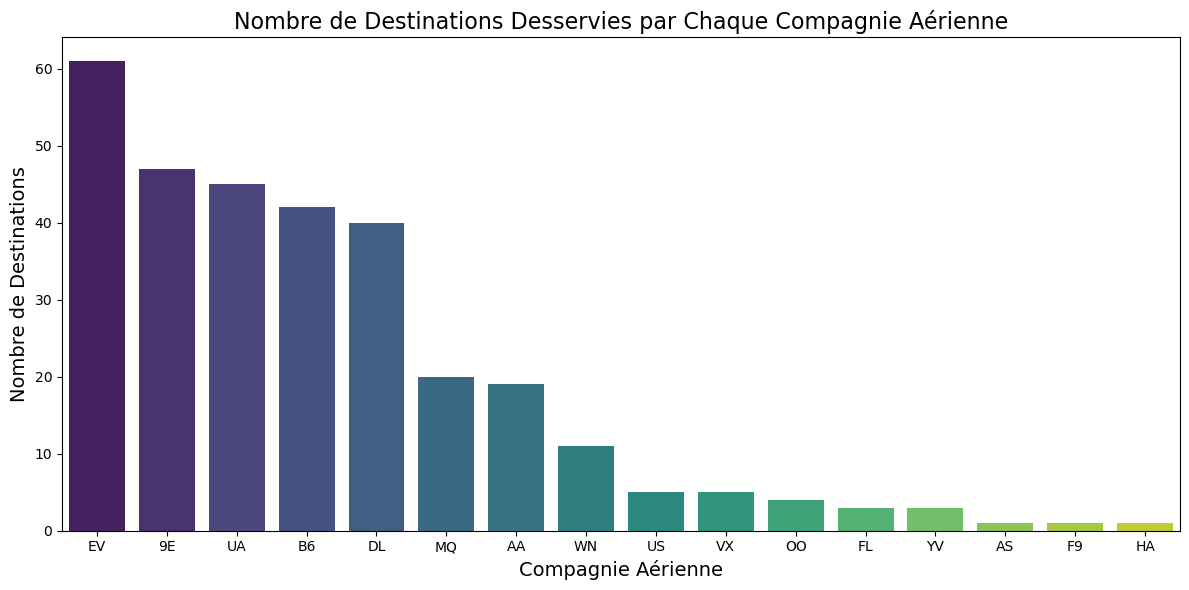

In [265]:
try:
    destinations_per_carrier = flights_data.groupby('carrier')['dest'].nunique().reset_index()

    destinations_per_carrier.columns = ['Compagnie', 'Nombre de Destinations']

    plt.figure(figsize=(12, 6))

    sns.barplot(data=destinations_per_carrier.sort_values('Nombre de Destinations', ascending=False),
                 x='Compagnie', y='Nombre de Destinations', palette='viridis')

    plt.title("Nombre de Destinations Desservies par Chaque Compagnie Aérienne", fontsize=16)
    plt.xlabel("Compagnie Aérienne", fontsize=14)
    plt.ylabel("Nombre de Destinations", fontsize=14)

    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Une erreur s'est produite lors de la lecture du fichier des vols : {e}")

Trouver tous les vols ayant atterri à Houston (IAH ou HOU)

In [266]:
try:
    houston_flights = flights_data[flights_data['dest'].isin(['IAH', 'HOU'])]

    print(f"Nombre total de vols ayant atterri à Houston (IAH ou HOU) : {houston_flights.shape[0]}")

    columns_of_interest = ['year', 'month', 'day', 'dep_time', 'arr_time', 
                           'carrier', 'flight', 'origin', 'dest', 'distance']
    houston_flights_filtered = houston_flights[columns_of_interest]

    print(houston_flights_filtered.head())

except Exception as e:
    print(f"Une erreur s'est produite lors de la lecture du fichier des vols : {e}")

Nombre total de vols ayant atterri à Houston (IAH ou HOU) : 6958
    year  month  day  dep_time arr_time carrier  flight origin dest  distance
0   2021      1    1     517.0      830      UA    1545    EWR  IAH      1400
1   2021      1    1     533.0      850      UA    1714    LGA  IAH      1416
32  2021      1    1     623.0      933      UA     496    LGA  IAH      1416
81  2021      1    1     728.0     1041      UA     473    LGA  IAH      1416
89  2021      1    1     739.0     1104      UA    1479    EWR  IAH      1400


Combien de vols partent de NYC airports vers Seattle

In [267]:
try:

    # Filtrer les vols partant de NYC vers Seattle
    nyc_airports = ['JFK', 'LGA', 'EWR']  # Aéroports de New York
    seattle_airport = 'SEA'  # Aéroport de Seattle

    # Compter les vols partant des aéroports de NYC vers Seattle
    flights_to_seattle = flights_data[
        (flights_data['origin'].isin(nyc_airports)) & 
        (flights_data['dest'] == seattle_airport)
    ]

    # Afficher le nombre total de vols trouvés
    print(f"Nombre total de vols partant de NYC vers Seattle : {flights_to_seattle.shape[0]}")

except Exception as e:
    print(f"Une erreur s'est produite lors de la lecture du fichier des vols : {e}")

Nombre total de vols partant de NYC vers Seattle : 2736


Combien de vols partent de NYC airports vers Seattle, combien de compagnies desservent cette destination et combien d’avions “uniques” ? 

In [268]:
try:
    # Filtrer les vols partant de NYC vers Seattle
    nyc_airports = ['JFK', 'LGA', 'EWR']  # Aéroports de New York
    seattle_airport = 'SEA'  # Aéroport de Seattle

    # Filtrer les vols
    flights_to_seattle = flights_data[
        (flights_data['origin'].isin(nyc_airports)) & 
        (flights_data['dest'] == seattle_airport)
    ]

    # Compter le nombre total de vols trouvés
    total_flights = flights_to_seattle.shape[0]

    # Compter le nombre de compagnies uniques
    unique_carriers = flights_to_seattle['carrier'].nunique()

    # Compter le nombre d'avions uniques
    unique_planes = flights_to_seattle['tailnum'].nunique()

    # Afficher les résultats
    print(f"Nombre total de vols partant de NYC vers Seattle : {total_flights}")
    print(f"Nombre de compagnies desservant Seattle : {unique_carriers}")
    print(f"Nombre d'avions uniques desservant Seattle : {unique_planes}")

except Exception as e:
    print(f"Une erreur s'est produite lors de la lecture du fichier des vols : {e}")

Nombre total de vols partant de NYC vers Seattle : 2736
Nombre de compagnies desservant Seattle : 5
Nombre d'avions uniques desservant Seattle : 857


Trouver le nombre de vols par destination ? 

In [269]:
try:
    # Compter le nombre de vols par destination
    flights_by_destination = flights_data['dest'].value_counts()

    # Afficher les résultats
    print("Nombre de vols par destination :")
    print(flights_by_destination)

except Exception as e:
    print(f"Une erreur s'est produite lors de la lecture du fichier des vols : {e}")

Nombre de vols par destination :
dest
ATL    12946
ORD    12654
LAX    11895
BOS    11560
MCO    10637
       ...  
TVC       16
MTJ       15
HDN       15
SBN        4
LEX        1
Name: count, Length: 103, dtype: int64


Trier les vols suivant la destination, l’aéroport d’origine, la compagnie dans un ordre alphabétique croissant (en réalisant les jointures nécessaires pour obtenir les noms explicites des aéroports) ?

In [270]:
try:
    # Renommer les colonnes des aéroports pour aligner avec les données de vols
    # Ici on prépare la jointure avec les colonnes de 'origin' et 'dest'
    airports_data.rename(columns={'faa': 'origin', 'name': 'origin_name'}, inplace=True)

    # Jointure pour obtenir les noms des aéroports d'origine
    flights_data = flights_data.merge(airports_data[['origin', 'origin_name']], on='origin', how='left')

    # Renommer la colonne 'origin_name' pour éviter les conflits lors de la prochaine jointure
    flights_data.rename(columns={'origin_name': 'origin_airport_name'}, inplace=True)

    # Renommer les colonnes pour la jointure avec les destinations
    airports_data.rename(columns={'origin': 'dest', 'origin_name': 'dest_name'}, inplace=True)

    # Jointure pour obtenir les noms des aéroports de destination
    flights_data = flights_data.merge(airports_data[['dest', 'dest_name']], on='dest', how='left')

    # Renommer la colonne 'dest_name' pour éviter des conflits futurs
    flights_data.rename(columns={'dest_name': 'dest_airport_name'}, inplace=True)

    # Trier les données par destination, aéroport d'origine et compagnie
    sorted_flights = flights_data.sort_values(by=['dest_airport_name', 'origin_airport_name', 'carrier'])

    # Afficher les résultats triés
    print(sorted_flights[['origin_airport_name', 'dest_airport_name', 'carrier']])

except Exception as e:
    print(f"Une erreur s'est produite lors de la lecture des fichiers : {e}")


        origin_airport_name              dest_airport_name carrier
288              La Guardia  Akron Canton Regional Airport      FL
759              La Guardia  Akron Canton Regional Airport      FL
1195             La Guardia  Akron Canton Regional Airport      FL
1691             La Guardia  Akron Canton Regional Airport      FL
2126             La Guardia  Akron Canton Regional Airport      FL
...                     ...                            ...     ...
251666  Newark Liberty Intl                            NaN      UA
251842  Newark Liberty Intl                            NaN      UA
252247  Newark Liberty Intl                            NaN      UA
252285  Newark Liberty Intl                            NaN      UA
252619  Newark Liberty Intl                            NaN      UA

[252704 rows x 3 columns]


Quelles sont les compagnies qui n'opèrent pas sur tous les aéroports d’origine ? 

In [271]:
try:
    # Étape 1 : Identifier tous les aéroports d'origine uniques
    unique_origins = flights_data['origin'].nunique()

    # Étape 2 : Compter le nombre d'aéroports d'origine desservis par chaque compagnie
    origins_per_carrier = flights_data.groupby('carrier')['origin'].nunique().reset_index()

    # Renommer les colonnes pour plus de clarté
    origins_per_carrier.columns = ['Compagnie', 'Nombre d\'Aéroports Desservis']

    # Étape 3 : Identifier les compagnies qui n'opèrent pas sur tous les aéroports d'origine
    airlines_not_serving_all_origins = origins_per_carrier[origins_per_carrier['Nombre d\'Aéroports Desservis'] < unique_origins]

    # Afficher le résultat
    print("Compagnies qui n'opèrent pas sur tous les aéroports d'origine :")
    print(airlines_not_serving_all_origins)

except Exception as e:
    print(f"Une erreur s'est produite lors de la lecture du fichier des vols : {e}")


Compagnies qui n'opèrent pas sur tous les aéroports d'origine :
   Compagnie  Nombre d'Aéroports Desservis
2         AS                             1
6         F9                             1
7         FL                             1
8         HA                             1
10        OO                             2
13        VX                             2
14        WN                             2
15        YV                             1


Quelles sont les compagnies qui desservent l’ensemble de destinations ?

In [272]:
try:
    # Étape 1 : Identifier toutes les destinations uniques
    unique_destinations = flights_data['dest'].nunique()

    # Étape 2 : Compter le nombre de destinations uniques desservies par chaque compagnie
    destinations_per_carrier = flights_data.groupby('carrier')['dest'].nunique().reset_index()

    # Renommer les colonnes pour plus de clarté
    destinations_per_carrier.columns = ['Compagnie', 'Nombre de Destinations Desservies']

    # Étape 3 : Identifier les compagnies qui desservent toutes les destinations
    airlines_serving_all_destinations = destinations_per_carrier[destinations_per_carrier['Nombre de Destinations Desservies'] == unique_destinations]

    # Afficher le résultat
    print("Compagnies qui desservent l'ensemble des destinations :")
    print(airlines_serving_all_destinations)

except Exception as e:
    print(f"Une erreur s'est produite lors de la lecture du fichier des vols : {e}")


Compagnies qui desservent l'ensemble des destinations :
Empty DataFrame
Columns: [Compagnie, Nombre de Destinations Desservies]
Index: []


In [273]:
try:
    # Étape 1 : Filtrer les colonnes nécessaires
    orig_dest_data = flights_data[['carrier', 'origin', 'dest']]

    # Étape 2 : Supprimer les doublons pour obtenir l'ensemble des origines et des destinations par compagnie
    unique_orig_dest = orig_dest_data.drop_duplicates()

    # Étape 3 : Renommer les colonnes pour plus de clarté (optionnel)
    unique_orig_dest.columns = ['Compagnie', 'Aéroport d\'Origine', 'Aéroport de Destination']

    # Afficher le tableau final
    print("Tableau des origines et destinations par compagnie :")
    print(unique_orig_dest)

except Exception as e:
    print(f"Une erreur s'est produite lors de la lecture du fichier des vols : {e}")


Tableau des origines et destinations par compagnie :
       Compagnie Aéroport d'Origine Aéroport de Destination
0             UA                EWR                     IAH
1             UA                LGA                     IAH
2             AA                JFK                     MIA
3             B6                JFK                     BQN
4             DL                LGA                     ATL
...          ...                ...                     ...
235071        MQ                LGA                     TVC
235657        9E                LGA                     BTV
235826        EV                LGA                     MYR
235891        OO                EWR                     DTW
242117        EV                LGA                     TVC

[431 rows x 3 columns]


Quelles sont les destinations qui sont exclusives à certaines compagnies ? 

In [274]:
try:
    destination_counts = flights_data.groupby('dest')['carrier'].nunique().reset_index()

    exclusive_destinations = destination_counts[destination_counts['carrier'] == 1]

    exclusive_dest_info = flights_data[flights_data['dest'].isin(exclusive_destinations['dest'])]

    exclusive_dest_info = exclusive_dest_info[['carrier', 'dest']].drop_duplicates()

    exclusive_dest_info.columns = ['Compagnie', 'Destination']

    print("Destinations exclusives à certaines compagnies :")
    print(exclusive_dest_info)

except Exception as e:
    print(f"Une erreur s'est produite lors de la lecture du fichier des vols : {e}")


Destinations exclusives à certaines compagnies :
       Compagnie Destination
50            UA         SNA
143           EV         MYR
156           WN         MDW
269           EV         SAV
288           FL         CAK
344           B6         LGB
360           EV         ALB
384           EV         MSN
387           EV         GSO
411           B6         BUR
671           MQ         CRW
695           B6         OAK
714           B6         SMF
733           EV         TUL
754           EV         OKC
802           EV         PVD
835           B6         PSE
1716          EV         BHM
3758          UA         HDN
3781          UA         BZN
3796          UA         MTJ
3861          DL         EYW
3866          VX         PSP
27377         B6         ACK
27881         B6         ABQ
27927         EV         ILM
43734         EV         SBN
77948         9E         LEX
137120        EV         CHO


Filtrer le vol pour trouver ceux exploités par United, American ou Delta ?

In [275]:
try:
    airlines_to_filter = ['UA', 'AA', 'DL']

    filtered_flights = flights_data[flights_data['carrier'].isin(airlines_to_filter)]

    print(f"Nombre total de vols exploités par United, American ou Delta : {filtered_flights.shape[0]}")
    
    print(filtered_flights.head())

except Exception as e:
    print(f"Une erreur s'est produite lors de la lecture du fichier des vols : {e}")


Nombre total de vols exploités par United, American ou Delta : 104742
   year  month  day  dep_time  sched_dep_time dep_delay arr_time  \
0  2021      1    1     517.0             515         2      830   
1  2021      1    1     533.0             529         4      850   
2  2021      1    1     542.0             540         2      923   
4  2021      1    1     554.0             600        -6      812   
5  2021      1    1     554.0             558        -4      740   

   sched_arr_time arr_delay carrier  ...  tailnum origin dest air_time  \
0             819        11      UA  ...   N14228    EWR  IAH      227   
1             830        20      UA  ...   N24211    LGA  IAH      227   
2             850        33      AA  ...   N619AA    JFK  MIA      160   
4             837       -25      DL  ...   N668DN    LGA  ATL      116   
5             728        12      UA  ...   N39463    EWR  ORD      150   

  distance  hour  minute             time_hour  origin_airport_name  \
0    